In [4]:
import pandas as pd
import numpy as np
import glob, os

In [5]:
path =r'/Users/robertpagano/src/Project 3 RAW DATA/raw_csv_files' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

list_ = []

for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)


df = pd.concat((pd.read_csv(f) for f in all_files))

Note that if I come back to this, I can make a custom function to parse out the json data:
https://stackoverflow.com/questions/20680272/parsing-a-json-string-which-was-loaded-from-a-csv-using-pandas

In [7]:
df.shape

(100475, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100475 entries, 0 to 1349
Data columns (total 37 columns):
backers_count               100475 non-null int64
blurb                       100470 non-null object
category                    100475 non-null object
converted_pledged_amount    100475 non-null int64
country                     100475 non-null object
created_at                  100475 non-null int64
creator                     100475 non-null object
currency                    100475 non-null object
currency_symbol             100475 non-null object
currency_trailing_code      100475 non-null bool
current_currency            100475 non-null object
deadline                    100475 non-null int64
disable_communication       100475 non-null bool
friends                     104 non-null object
fx_rate                     100475 non-null float64
goal                        100475 non-null float64
id                          100475 non-null int64
is_backing                  104 no

In [15]:
df['date_created'] = pd.to_datetime(df['created_at'], unit='s') # when project creator started work on project
df['deadline_date'] = pd.to_datetime(df['deadline'], unit='s')
df['launched_date'] = pd.to_datetime(df['launched_at'], unit='s') # when creator launched project, starts countdown for deadline

In [24]:
import datetime

In [45]:
df['time_to_launch'] = (df['launched_date'] - df['date_created']).dt.days # num days from creation to launch
df['day_limit'] = (df['deadline_date'] - df['launched_date']).dt.days # num days from launch to deadline

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100475 entries, 0 to 1349
Data columns (total 42 columns):
backers_count               100475 non-null int64
blurb                       100470 non-null object
category                    100475 non-null object
converted_pledged_amount    100475 non-null int64
country                     100475 non-null object
created_at                  100475 non-null int64
creator                     100475 non-null object
currency                    100475 non-null object
currency_symbol             100475 non-null object
currency_trailing_code      100475 non-null bool
current_currency            100475 non-null object
deadline                    100475 non-null int64
disable_communication       100475 non-null bool
friends                     104 non-null object
fx_rate                     100475 non-null float64
goal                        100475 non-null float64
id                          100475 non-null int64
is_backing                  104 no

In [47]:
df.sample(5)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,date_created,deadline_date,launched_date,time_to_launch,day_limit
2708,148,We're making a new record -- independently! We...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",8349,US,1354762461,"{""id"":1120931949,""name"":""The Floorwalkers"",""is...",USD,$,True,...,1367867536,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",8349.000000,international,2012-12-06 02:54:21,2013-05-06 19:12:16,2013-04-06 19:12:16,121,30
1076,13,A magic wand won't shrink your utility bills b...,"{""id"":52,""name"":""Hardware"",""slug"":""technology/...",592,GB,1381416660,"{""id"":457452823,""name"":""Alex Gardiner"",""is_reg...",GBP,£,False,...,1400713210,1.679394,"{""web"":{""project"":""https://www.kickstarter.com...",591.146572,domestic,2013-10-10 14:51:00,2014-05-21 23:00:00,2014-04-22 10:38:06,193,29
575,0,Le Chat L'heureux est un projet de bar-à-chats...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",0,FR,1449338293,"{""id"":1468814329,""name"":""Dumont Cédric"",""is_re...",EUR,€,False,...,1451936904,1.092968,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,2015-12-05 17:58:13,2016-01-04 19:48:23,2015-12-05 19:48:23,0,30
3099,59,Secrets sewn.\nSet during the Great Depression...,"{""id"":31,""name"":""Narrative Film"",""slug"":""film ...",21054,US,1331252689,"{""id"":1037495949,""name"":""christine"",""slug"":""pp...",USD,$,True,...,1337533800,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",21054.000000,international,2012-03-09 00:24:49,2012-05-20 17:10:00,2012-04-20 17:10:00,42,30
462,91,A Little Luck can go a Wrong WAY! http://www.e...,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",15015,US,1296088669,"{""id"":1361052734,""name"":""Christopher C. Brown""...",USD,$,True,...,1301937627,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",15015.000000,international,2011-01-27 00:37:49,2011-04-04 17:20:27,2011-02-01 18:20:27,5,61


In [62]:
df['project_name_length']  = df['name'].str.split().str.len() # length of project name in words
df['blurb_length']  = df['blurb'].str.split().str.len() # length of blurb in words


In [63]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,urls,usd_pledged,usd_type,date_created,deadline_date,launched_date,time_to_launch,day_limit,project_name_length,blurb_length
0,4,"Help a small, licensed home bakery grow!","{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",420,US,1424393180,"{""id"":593249816,""name"":""Natty B's Bakery"",""slu...",USD,$,True,...,"{""web"":{""project"":""https://www.kickstarter.com...",420.000000,international,2015-02-20 00:46:20,2015-04-10 06:59:00,2015-02-20 17:14:10,0,48,6.0,7.0
1,148,The Unseen: An Atlas of Infrared Plates is a p...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",9663,GB,1459511601,"{""id"":1092524383,""name"":""Edward Thompson"",""is_...",GBP,£,False,...,"{""web"":{""project"":""https://www.kickstarter.com...",9590.455319,international,2016-04-01 11:53:21,2016-05-31 10:18:24,2016-04-28 10:18:24,26,33,7.0,24.0
2,1,Fine Wall Mounted Furnishings Crafted From Sla...,"{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",1,US,1535492228,"{""id"":271472395,""name"":""Tyler Jones"",""is_regis...",USD,$,True,...,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,international,2018-08-28 21:37:08,2018-09-22 23:40:22,2018-08-28 23:40:22,0,25,7.0,19.0
3,77,"We've written the songs, made the recordings a...","{""id"":37,""name"":""Country & Folk"",""slug"":""music...",4806,GB,1411314106,"{""id"":979672460,""name"":""Tracey Browne (deleted...",GBP,£,False,...,"{""web"":{""project"":""https://www.kickstarter.com...",4772.442559,domestic,2014-09-21 15:41:46,2014-11-05 19:30:00,2014-10-16 16:20:53,25,20,8.0,25.0
4,52,Luxurious polo shirts that utilize Japanese na...,"{""id"":341,""name"":""Wearables"",""slug"":""technolog...",6094,CA,1519389078,"{""id"":1241479417,""name"":""Progenomics LLC"",""slu...",CAD,$,True,...,"{""web"":{""project"":""https://www.kickstarter.com...",6018.943243,domestic,2018-02-23 12:31:18,2018-04-23 13:40:36,2018-03-24 13:40:36,29,30,9.0,20.0


In [65]:
df_edas = df.loc[:, ['state', 'spotlight', 'staff_pick', 'project_name_length', 'blurb_length', 'time_to_launch', 'day_limit', 'date_created', 'country', 'goal', 'pledged']]

In [66]:
df_edas.head()

,state,spotlight,staff_pick,project_name_length,blurb_length,time_to_launch,day_limit,date_created,country,goal,pledged
0,canceled,False,False,6.0,7.0,0,48,2015-02-20 00:46:20,US,6000.0,420.0
1,successful,True,True,7.0,24.0,26,33,2016-04-01 11:53:21,GB,5000.0,6577.0
2,failed,False,False,7.0,19.0,0,25,2018-08-28 21:37:08,US,2000.0,1.0
3,successful,True,False,8.0,25.0,25,20,2014-09-21 15:41:46,GB,2500.0,3002.0
4,successful,True,False,9.0,20.0,29,30,2018-02-23 12:31:18,CA,1000.0,7775.0


In [68]:
df_edas = df_edas[df_edas['state'] != 'live']

In [71]:
df_edas.state.unique()

array(['canceled', 'successful', 'failed', 'suspended'], dtype=object)

In [72]:
df_edas['state'].replace('canceled','failed',inplace=True)
df_edas['state'].replace('suspended','failed',inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [73]:
df_edas.state.unique()

array(['failed', 'successful'], dtype=object)

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df_edas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97417 entries, 0 to 1349
Data columns (total 11 columns):
state                  97417 non-null object
spotlight              97417 non-null bool
staff_pick             97417 non-null bool
project_name_length    97416 non-null float64
blurb_length           97412 non-null float64
time_to_launch         97417 non-null int64
day_limit              97417 non-null int64
date_created           97417 non-null datetime64[ns]
country                97417 non-null object
goal                   97417 non-null float64
pledged                97417 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 10.1+ MB


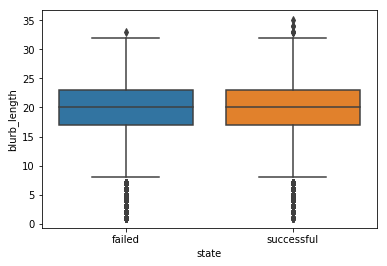

In [84]:
sns.boxplot(x = df_edas['state'], y = df_edas['blurb_length']);

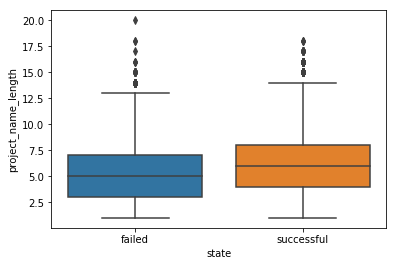

In [85]:
sns.boxplot(x = df_edas['state'], y = df_edas['project_name_length']);

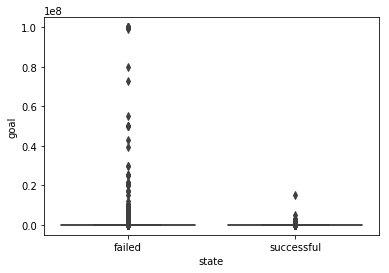

In [86]:
sns.boxplot(x = df_edas['state'], y = df_edas['goal']);

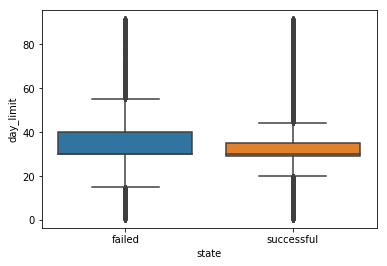

In [87]:
sns.boxplot(x = df_edas['state'], y = df_edas['day_limit']);